# **predict if a student can Graduate ON Time**


---

**Our Dataset:**

*StudentClass.csv:* This is students’ performance in 10 core classes after joining college.

*StudentGraduate.csv:* This is the students’ background information, and if this student graduate on time.



**variables of StudentGraduate dataset**

ID

HS_ENGLISH： Number of semesters taking English in High school

HS_MATH： Number of semesters taking Math in High school

HS_HISTORY： Number of semesters taking History in High school

HS_LAB_SCIENCES： Number of semesters taking Lab Science in High school

HS_FOREIGN_LANGUAGE： Number of semesters taking Foreign Language in High school

HS_ART: Number of semesters taking Art  in High school

HS_ELECTIVES： Number of semesters taking Electives in High school

HS_GPA: High school GPA

sex

WRITINGScore: SAT writing score

GraduateONTime: 1 graduate on time. 0 not on time

Major


**Variables of StudentClass dataset**

StudentID

GRADE

ClassWeekDay

ClassMeetTime

ClassDate

ClassTitle


### 1.Data Exploring

In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from itertools import chain
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

c:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# Read graduate data and show the head rows of that
Graduate = pd.read_csv(r"C:\Users\ASUS\Desktop\CSULB\Machin Learning for Business Analytics IS670\Project2\StudentGraduate.csv")
Graduate.head()

,ID,HS_ENGLISH,HS_MATH,HS_HISTORY,HS_LAB_SCIENCES,HS_FOREIGN_LANGUAGE,HS_ART,HS_ELECTIVES,HS_GPA,sex,WRITINGScore,GraduateONTime,Major
0,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN
1,2,8,10,7,6,8,10,0,3.712993,1,558,0,MGMT
2,3,8,7,6,6,4,4,0,4.373719,1,634,1,MKTG
3,4,8,8,6,6,4,2,0,4.046570,0,386,0,MKTG
4,5,8,6,6,4,4,3,1,2.560076,0,381,0,MGMT


In [4]:
# Read emplyee data and show the head rows of that
Class = pd.read_csv(r"C:\Users\ASUS\Desktop\CSULB\Machin Learning for Business Analytics IS670\Project2\StudentClass.csv")
Class.head()

,StudentID,GRADE,ClassWeekDay,ClassMeetTime,ClassDate,ClassTitle
0,1.0,A,MW,15:30:00,9/1/2004,Math
1,1.0,A,M,19:00:00,9/1/2004,English
2,1.0,C,W,19:00:00,9/1/2004,Physics
3,1.0,B,MW,11:00:00,9/1/2004,Art
4,1.0,B,MW,12:30:00,9/1/2005,SocialStudy


In [5]:
#Changing the name of StudentID TO ID
Class.rename(columns={'StudentID': 'ID'}, inplace=True)

In [6]:
#Combining the two files into one dataframe based on EmployeeID
df = pd.merge(Graduate, Class, on = 'ID')
df.head()

,ID,HS_ENGLISH,HS_MATH,HS_HISTORY,HS_LAB_SCIENCES,HS_FOREIGN_LANGUAGE,HS_ART,HS_ELECTIVES,HS_GPA,sex,WRITINGScore,GraduateONTime,Major,GRADE,ClassWeekDay,ClassMeetTime,ClassDate,ClassTitle
0,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,A,MW,15:30:00,9/1/2004,Math
1,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,A,M,19:00:00,9/1/2004,English
2,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,C,W,19:00:00,9/1/2004,Physics
3,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,B,MW,11:00:00,9/1/2004,Art
4,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,B,MW,12:30:00,9/1/2005,SocialStudy


In [7]:
df.shape

(10000, 18)

In [8]:
df.dtypes

ID                       int64
HS_ENGLISH               int64
HS_MATH                  int64
HS_HISTORY               int64
HS_LAB_SCIENCES          int64
HS_FOREIGN_LANGUAGE      int64
HS_ART                   int64
HS_ELECTIVES             int64
HS_GPA                 float64
sex                      int64
WRITINGScore             int64
GraduateONTime           int64
Major                   object
GRADE                   object
ClassWeekDay            object
ClassMeetTime           object
ClassDate               object
ClassTitle              object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500.500000,288.689425,1.000000,250.750000,500.500000,750.250000,1000.000000
HS_ENGLISH,10000.0,8.077000,0.622181,0.000000,8.000000,8.000000,8.000000,14.000000
HS_MATH,10000.0,8.340000,1.671131,0.000000,8.000000,8.000000,10.000000,14.000000
HS_HISTORY,10000.0,6.154000,0.993168,0.000000,6.000000,6.000000,6.000000,12.000000
HS_LAB_SCIENCES,10000.0,6.524000,1.538720,0.000000,6.000000,6.000000,8.000000,16.000000
HS_FOREIGN_LANGUAGE,10000.0,5.930000,1.623380,0.000000,4.000000,6.000000,6.000000,12.000000
HS_ART,10000.0,3.856000,2.749185,0.000000,2.000000,3.000000,4.000000,16.000000
HS_ELECTIVES,10000.0,1.400000,1.608807,0.000000,0.000000,1.000000,2.000000,11.000000
HS_GPA,10000.0,3.414438,0.471877,2.189598,3.080254,3.413547,3.766603,4.544668
sex,10000.0,0.415000,0.492747,0.000000,0.000000,0.000000,1.000000,1.000000


Graduate on time by Major 



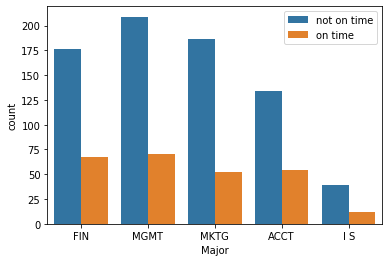

In [54]:
sns.countplot(x ='Major',data=Graduate,hue="GraduateONTime")
plt.legend(['not on time','on time'])
print('Graduate on time by Major \n')

Graduate on time by GRADE 



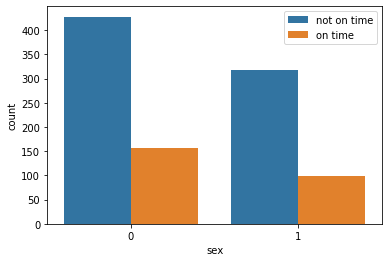

In [55]:
sns.countplot(x ='sex',data=Graduate,hue="GraduateONTime")
plt.legend(['not on time','on time'])

print('Graduate on time by GRADE \n')

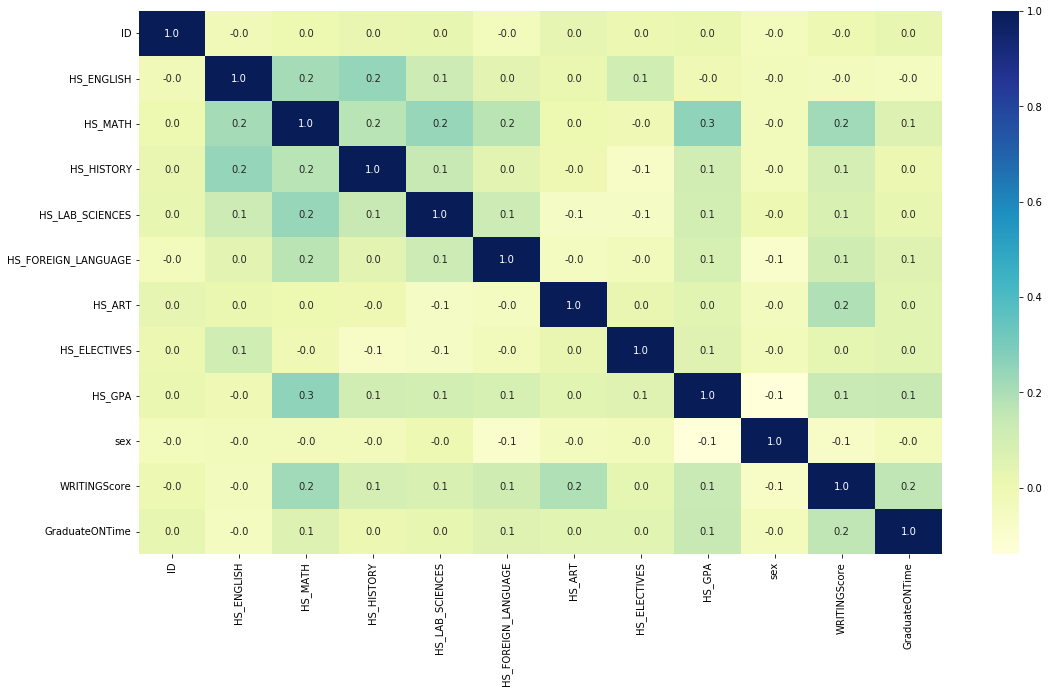

In [56]:
plt.figure(figsize=(18, 10))
corr = df.corr()
sns.heatmap(corr,cmap ="YlGnBu",cbar=True,annot=True,fmt=".1f")
plt.show()

In [57]:
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['feature1', 'feature2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
matrix= corrdf.sort_values(by = 'Correlation', ascending = False)
high_corr = matrix[matrix['Correlation']>0.2]
high_corr

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,feature1,feature2,Correlation
98,HS_GPA,HS_MATH,0.26
50,HS_LAB_SCIENCES,HS_MATH,0.24
37,HS_HISTORY,HS_ENGLISH,0.24
122,WRITINGScore,HS_MATH,0.22
25,HS_MATH,HS_ENGLISH,0.21


### 2. Data prepration

In [58]:
df['ClassDate'] = pd.to_datetime(df['ClassDate'])

In [59]:
# creates semesters from each class
df['Semester'] = df.ClassDate.dt.year.astype(str) + " S" + \
    np.where(df.ClassDate.dt.quarter.gt(2),1,2).astype(str)
df

,ID,HS_ENGLISH,HS_MATH,HS_HISTORY,HS_LAB_SCIENCES,HS_FOREIGN_LANGUAGE,HS_ART,HS_ELECTIVES,HS_GPA,sex,WRITINGScore,GraduateONTime,Major,GRADE,ClassWeekDay,ClassMeetTime,ClassDate,ClassTitle,Semester
0,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,A,MW,15:30:00,2004-09-01,Math,2004 S1
1,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,A,M,19:00:00,2004-09-01,English,2004 S1
2,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,C,W,19:00:00,2004-09-01,Physics,2004 S1
3,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,B,MW,11:00:00,2004-09-01,Art,2004 S1
4,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,B,MW,12:30:00,2005-09-01,SocialStudy,2005 S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,C,MW,15:30:00,2008-09-01,Physics,2008 S1
9996,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,C,MW,14:00:00,2008-09-01,Math,2008 S1
9997,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,C,TTH,12:30:00,2008-09-01,ForeignLanguage,2008 S1
9998,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,B,TU,19:00:00,2009-09-01,Music,2009 S1


In [60]:
# drop the last two semesters for each student 
df = df.drop(df.groupby('ID').tail(2).index, axis=0)
df

,ID,HS_ENGLISH,HS_MATH,HS_HISTORY,HS_LAB_SCIENCES,HS_FOREIGN_LANGUAGE,HS_ART,HS_ELECTIVES,HS_GPA,sex,WRITINGScore,GraduateONTime,Major,GRADE,ClassWeekDay,ClassMeetTime,ClassDate,ClassTitle,Semester
0,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,A,MW,15:30:00,2004-09-01,Math,2004 S1
1,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,A,M,19:00:00,2004-09-01,English,2004 S1
2,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,C,W,19:00:00,2004-09-01,Physics,2004 S1
3,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,B,MW,11:00:00,2004-09-01,Art,2004 S1
4,1,8,8,7,8,6,4,1,3.691959,1,428,0,FIN,B,MW,12:30:00,2005-09-01,SocialStudy,2005 S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,C,MW,12:30:00,2008-03-01,English,2008 S2
9994,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,C,TTH,9:30:00,2008-03-01,Statistics,2008 S2
9995,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,C,MW,15:30:00,2008-09-01,Physics,2008 S1
9996,1000,8,6,6,6,4,16,9,3.690760,0,552,1,FIN,C,MW,14:00:00,2008-09-01,Math,2008 S1


In [62]:
df['GraduateONTime'] = df['GraduateONTime'].replace([0,1], ['Not on time','on time'])
df

,ID,HS_ENGLISH,HS_MATH,HS_HISTORY,HS_LAB_SCIENCES,HS_FOREIGN_LANGUAGE,HS_ART,HS_ELECTIVES,HS_GPA,sex,WRITINGScore,GraduateONTime,Major,GRADE,ClassWeekDay,ClassMeetTime,ClassDate,ClassTitle,Semester
0,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,A,MW,15:30:00,2004-09-01,Math,2004 S1
1,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,A,M,19:00:00,2004-09-01,English,2004 S1
2,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,C,W,19:00:00,2004-09-01,Physics,2004 S1
3,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,B,MW,11:00:00,2004-09-01,Art,2004 S1
4,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,B,MW,12:30:00,2005-09-01,SocialStudy,2005 S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,MW,12:30:00,2008-03-01,English,2008 S2
9994,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,TTH,9:30:00,2008-03-01,Statistics,2008 S2
9995,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,MW,15:30:00,2008-09-01,Physics,2008 S1
9996,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,MW,14:00:00,2008-09-01,Math,2008 S1


In [91]:
#Droppping unnecessary columns
df_drop=df.drop(columns=['ClassMeetTime','ClassDate'])
df_drop

,ID,HS_ENGLISH,HS_MATH,HS_HISTORY,HS_LAB_SCIENCES,HS_FOREIGN_LANGUAGE,HS_ART,HS_ELECTIVES,HS_GPA,sex,WRITINGScore,GraduateONTime,Major,GRADE,ClassWeekDay,ClassTitle,Semester
0,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,A,MW,Math,2004 S1
1,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,A,M,English,2004 S1
2,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,C,W,Physics,2004 S1
3,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,B,MW,Art,2004 S1
4,1,8,8,7,8,6,4,1,3.691959,1,428,Not on time,FIN,B,MW,SocialStudy,2005 S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,MW,English,2008 S2
9994,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,TTH,Statistics,2008 S2
9995,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,MW,Physics,2008 S1
9996,1000,8,6,6,6,4,16,9,3.690760,0,552,on time,FIN,C,MW,Math,2008 S1


In [92]:
df_drop.dtypes

ID                        int64
HS_ENGLISH                int64
HS_MATH                   int64
HS_HISTORY                int64
HS_LAB_SCIENCES           int64
HS_FOREIGN_LANGUAGE       int64
HS_ART                    int64
HS_ELECTIVES              int64
HS_GPA                  float64
sex                       int64
WRITINGScore              int64
GraduateONTime         category
Major                  category
GRADE                  category
ClassWeekDay           category
ClassTitle             category
Semester               category
dtype: object

In [93]:
# Change categorical variables to "category"
df_drop['Major'] = df_drop['Major'].astype('category')
df_drop['GRADE'] = df_drop['GRADE'].astype('category')
df_drop['ClassWeekDay'] = df_drop['ClassWeekDay'].astype('category')
df_drop['ClassTitle'] = df_drop['ClassTitle'].astype('category')
df_drop['Semester'] = df_drop['Semester'].astype('category')
df_drop['GraduateONTime'] = df_drop['GraduateONTime'].astype('category')

In [94]:
df_drop.dtypes

ID                        int64
HS_ENGLISH                int64
HS_MATH                   int64
HS_HISTORY                int64
HS_LAB_SCIENCES           int64
HS_FOREIGN_LANGUAGE       int64
HS_ART                    int64
HS_ELECTIVES              int64
HS_GPA                  float64
sex                       int64
WRITINGScore              int64
GraduateONTime         category
Major                  category
GRADE                  category
ClassWeekDay           category
ClassTitle             category
Semester               category
dtype: object

In [95]:
#determine columns with blank/missing data
df_drop.isnull().sum()

ID                     0
HS_ENGLISH             0
HS_MATH                0
HS_HISTORY             0
HS_LAB_SCIENCES        0
HS_FOREIGN_LANGUAGE    0
HS_ART                 0
HS_ELECTIVES           0
HS_GPA                 0
sex                    0
WRITINGScore           0
GraduateONTime         0
Major                  0
GRADE                  0
ClassWeekDay           0
ClassTitle             0
Semester               0
dtype: int64

In [96]:
#Replace null fields with median because they are all integer and check again
df_drop.fillna(df.median(), inplace=True)
df_drop.isnull().sum()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ID                     0
HS_ENGLISH             0
HS_MATH                0
HS_HISTORY             0
HS_LAB_SCIENCES        0
HS_FOREIGN_LANGUAGE    0
HS_ART                 0
HS_ELECTIVES           0
HS_GPA                 0
sex                    0
WRITINGScore           0
GraduateONTime         0
Major                  0
GRADE                  0
ClassWeekDay           0
ClassTitle             0
Semester               0
dtype: int64

In [97]:
#Check columns with just 1 unique value
uniquecount = df_drop.nunique()
print(uniquecount)

ID                     1000
HS_ENGLISH                9
HS_MATH                  12
HS_HISTORY               10
HS_LAB_SCIENCES          12
HS_FOREIGN_LANGUAGE      10
HS_ART                   17
HS_ELECTIVES             12
HS_GPA                 1000
sex                       2
WRITINGScore            316
GraduateONTime            2
Major                     5
GRADE                     5
ClassWeekDay              8
ClassTitle               10
Semester                 16
dtype: int64


### 3.Decision Tree Model

In [98]:
# Create dummy variables
df1 = pd.get_dummies(df_drop, columns=['Major','GRADE','ClassWeekDay','ClassTitle','Semester'],drop_first=True)
df1

,ID,HS_ENGLISH,HS_MATH,HS_HISTORY,HS_LAB_SCIENCES,HS_FOREIGN_LANGUAGE,HS_ART,HS_ELECTIVES,HS_GPA,sex,...,Semester_2007 S1,Semester_2007 S2,Semester_2008 S1,Semester_2008 S2,Semester_2009 S1,Semester_2010 S1,Semester_2010 S2,Semester_2011 S1,Semester_2011 S2,Semester_2012 S2
0,1,8,8,7,8,6,4,1,3.691959,1,...,0,0,0,0,0,0,0,0,0,0
1,1,8,8,7,8,6,4,1,3.691959,1,...,0,0,0,0,0,0,0,0,0,0
2,1,8,8,7,8,6,4,1,3.691959,1,...,0,0,0,0,0,0,0,0,0,0
3,1,8,8,7,8,6,4,1,3.691959,1,...,0,0,0,0,0,0,0,0,0,0
4,1,8,8,7,8,6,4,1,3.691959,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1000,8,6,6,6,4,16,9,3.690760,0,...,0,0,0,1,0,0,0,0,0,0
9994,1000,8,6,6,6,4,16,9,3.690760,0,...,0,0,0,1,0,0,0,0,0,0
9995,1000,8,6,6,6,4,16,9,3.690760,0,...,0,0,1,0,0,0,0,0,0,0
9996,1000,8,6,6,6,4,16,9,3.690760,0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
# Apply standardization
numeric_variables = df1[['HS_ENGLISH','ID','HS_MATH','HS_HISTORY','HS_LAB_SCIENCES','HS_FOREIGN_LANGUAGE','HS_ART','HS_ELECTIVES','HS_GPA','sex','WRITINGScore']]
scaler_s = StandardScaler().fit(numeric_variables)
standard_variables = scaler_s.transform(numeric_variables)
print(standard_variables)
df1[['HS_ENGLISH','ID','HS_MATH','HS_HISTORY','HS_LAB_SCIENCES','HS_FOREIGN_LANGUAGE','HS_ART','HS_ELECTIVES','HS_GPA','sex','WRITINGScore']] = standard_variables

[[-0.12376431 -1.73031962 -0.20346518 ...  0.58815004  1.187282
  -0.86595441]
 [-0.12376431 -1.73031962 -0.20346518 ...  0.58815004  1.187282
  -0.86595441]
 [-0.12376431 -1.73031962 -0.20346518 ...  0.58815004  1.187282
  -0.86595441]
 ...
 [-0.12376431  1.73031962 -1.4003192  ...  0.5856081  -0.84225988
   0.73155729]
 [-0.12376431  1.73031962 -1.4003192  ...  0.5856081  -0.84225988
   0.73155729]
 [-0.12376431  1.73031962 -1.4003192  ...  0.5856081  -0.84225988
   0.73155729]]


In [100]:
# Partition the data
target = df1['GraduateONTime']
predictors = df1.drop(['GraduateONTime'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(5600, 50) (2400, 50) (5600,) (2400,)


In [101]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize= True))

Not on time    0.741964
on time        0.258036
Name: GraduateONTime, dtype: float64


In [102]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize= True))

Not on time    0.752083
on time        0.247917
Name: GraduateONTime, dtype: float64


In [105]:
# Build a decision tree model on training data with max_depth = 2
model = DecisionTreeClassifier(criterion = 'entropy', random_state= 1, max_depth=3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.625, 0.875, 'HS_GPA <= 2.064\nentropy = 0.824\nsamples = 5600\nvalue = [4155, 1445]\nclass = No'),
 Text(0.5, 0.625, 'WRITINGScore <= 0.3\nentropy = 0.809\nsamples = 5530\nvalue = [4155, 1375]\nclass = No'),
 Text(0.25, 0.375, 'HS_GPA <= -1.702\nentropy = 0.708\nsamples = 3550\nvalue = [2865, 685]\nclass = No'),
 Text(0.125, 0.125, 'entropy = 0.16\nsamples = 171\nvalue = [167, 4]\nclass = No'),
 Text(0.375, 0.125, 'entropy = 0.725\nsamples = 3379\nvalue = [2698, 681]\nclass = No'),
 Text(0.75, 0.375, 'HS_GPA <= -0.51\nentropy = 0.933\nsamples = 1980\nvalue = [1290, 690]\nclass = No'),
 Text(0.625, 0.125, 'entropy = 0.758\nsamples = 557\nvalue = [435, 122]\nclass = No'),
 Text(0.875, 0.125, 'entropy = 0.97\nsamples = 1423\nvalue = [855, 568]\nclass = No'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 70\nvalue = [0, 70]\nclass = Yes')]

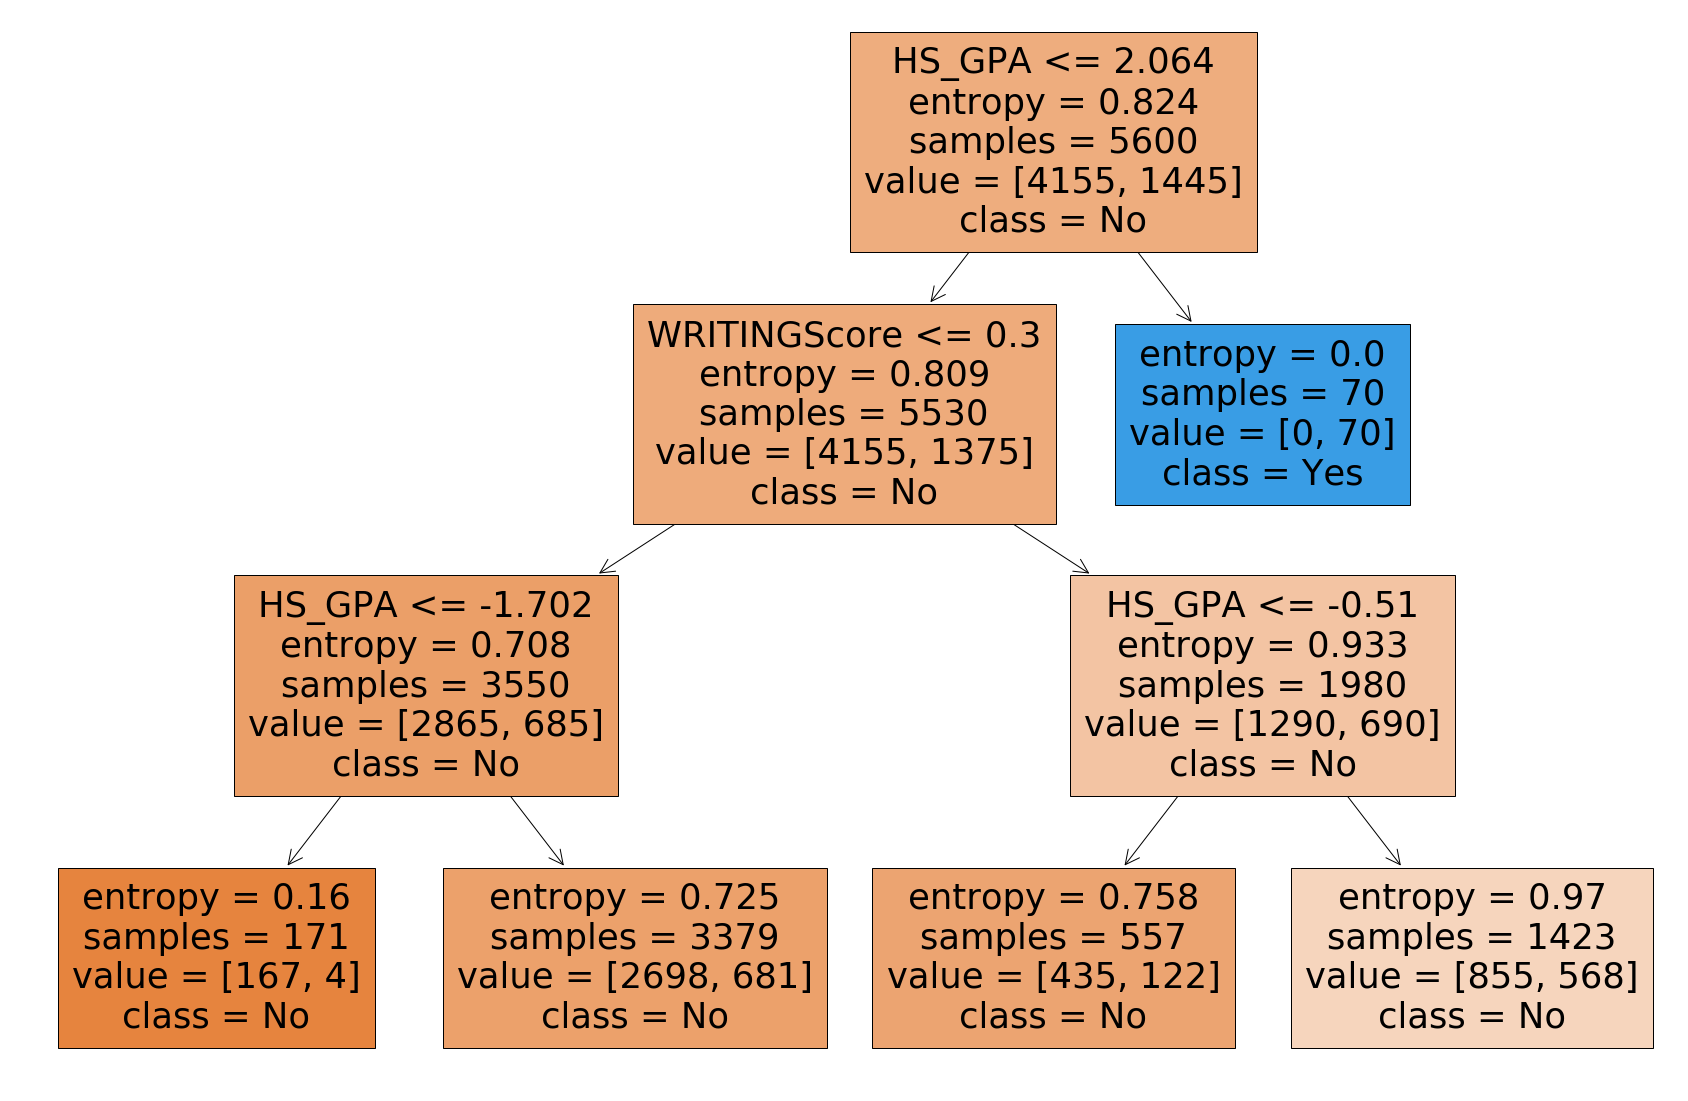

In [106]:
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)

In [107]:
# Make predictions on training and testing data
prediction_on_train = model.predict(predictors_train)
prediction_on_test = model.predict(predictors_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


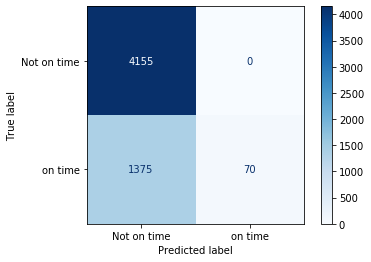

In [108]:
# Examine the evaluation results on training data: confusion_matrix
plot_confusion_matrix(model, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


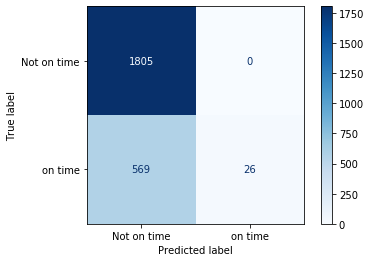

In [109]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [110]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

 Not on time       0.75      1.00      0.86      4155
     on time       1.00      0.05      0.09      1445

    accuracy                           0.75      5600
   macro avg       0.88      0.52      0.48      5600
weighted avg       0.82      0.75      0.66      5600



In [111]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

 Not on time       0.76      1.00      0.86      1805
     on time       1.00      0.04      0.08       595

    accuracy                           0.76      2400
   macro avg       0.88      0.52      0.47      2400
weighted avg       0.82      0.76      0.67      2400

